In [23]:
import pandas as pd
import json 
import urllib
import os
import requests
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
# URL адрес нашего сервера, где.
myurl = "http://localhost:8180/service" 

In [25]:
# Процедура для отправки POST запросов к серверу.

def flask_server_exchenge(body={}, file_name=None):
    req = urllib.request.Request(myurl) 
    req.add_header('Content-Type', 'multipart/form-data; charset=utf-8')
    values = {
             'file':(os.path.basename(file_name), open(file_name,'rb'), 'image/tiff'),
             'json':(None, json.dumps(body), 'application/json')
            }
    print('file_read')

    data = urllib.parse.urlencode(values).encode('utf-8')
    req.add_header('Content-Length', len(data))
    
    response = urllib.request.urlopen(req,data)
    print(response.status)

In [26]:
def draw_result(image, obj_type, boxes=None):
    fig, ax = plt.subplots(1,1,figsize=(10,7))
    ax.imshow(image)
    if boxes:
        for box in boxes:
            rect = plt.Rectangle((box['left'], box['top']),
                                  box['width'], box['height'],fill=False, color='red')
            ax.add_patch(rect)
    ax.title.set_text(str(obj_type))
    plt.show()

In [27]:
def flask_server_exchenge(file_name=None, method_name=None):

    body = {
            'method': method_name, #"object_localization", 
           }

    values = {
             'file':(os.path.basename(file_name), open(file_name,'rb'), 'image/jpeg'),
             'json':('datas', json.dumps(body), 'application/json')
            }
    r =requests.post(myurl,files=values)
#     print(str(r.content,'utf-8'))
    return json.loads(r.content)

### Получим список изображений из дирректории images.

In [28]:
def filelist(root, file_type):
    """Функция возвращает полностью квалифицированный список файлов в директории"""
    return [os.path.join(directory_path, f) for directory_path, directory_name, 
            files in os.walk(root) for f in files if f.endswith(file_type)]

In [29]:
files = filelist('images/','.tif')
files

['images/adh36e00_2.tif',
 'images/adn64a00-page02_2.tif',
 'images/aki32e00.tif',
 'images/bfr18e00-page02_1.tif',
 'images/ciy01a00-page02_1.tif',
 'images/nuz52d00.tif',
 'images/obh31f00_3.tif',
 'images/rnf51a00.tif',
 'images/rqv98d00-page02_1.tif']

### Посмотрим ответ от сервера.

In [30]:
flask_server_exchenge(file_name=files[1], method_name="object_localization")

{'object_localization': [{'type': 'void'}], 'success': True}

Отправим поочередно все изображения из директории images на сервер. Полученный bounding box наложим на изображение.

[{'position': {'height': 409, 'left': 1161, 'top': 2241, 'width': 769}, 'source': {'height': 3246, 'width': 2560}, 'type': 'sign'}]


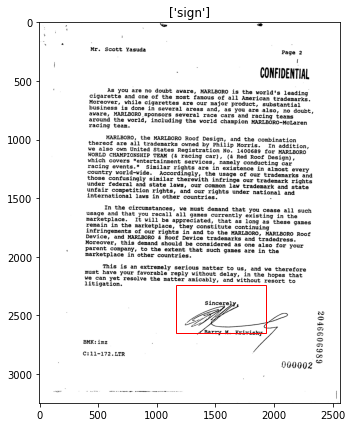

[{'type': 'void'}]


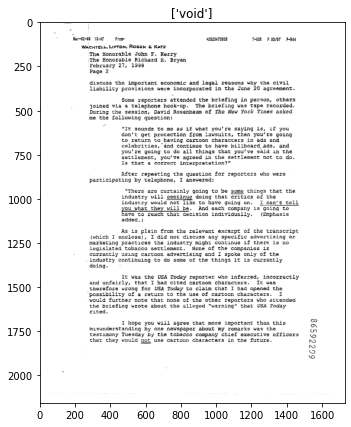

[{'position': {'height': 366, 'left': 1028, 'top': 2402, 'width': 822}, 'source': {'height': 3274, 'width': 2560}, 'type': 'sign'}]


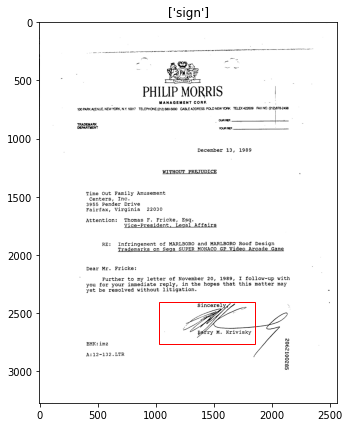

[{'position': {'height': 98, 'left': 1320, 'top': 2266, 'width': 179}, 'source': {'height': 3296, 'width': 2560}, 'type': 'sign'}]


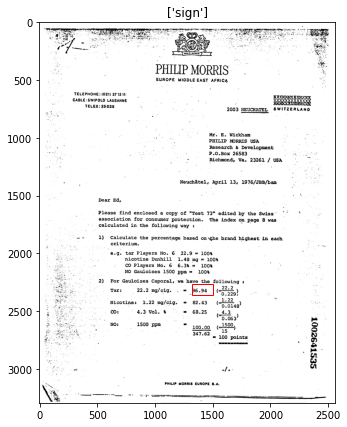

[{'type': 'void'}]


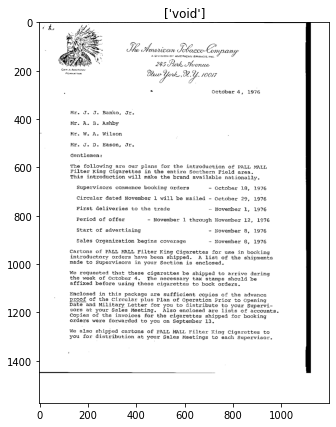

[{'type': 'void'}]


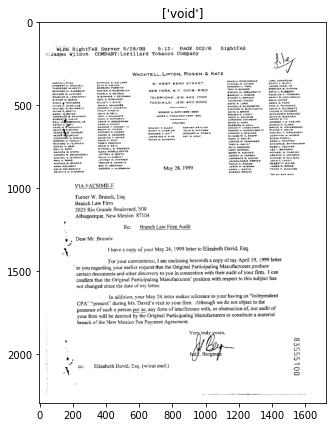

[{'position': {'height': 170, 'left': 447, 'top': 791, 'width': 255}, 'source': {'height': 1575, 'width': 1200}, 'type': 'sign'}]


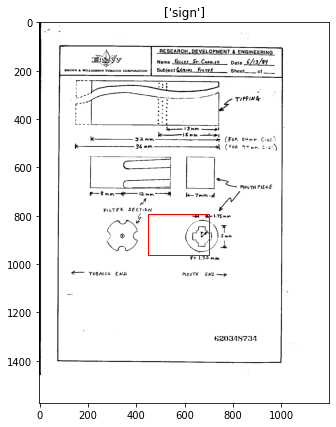

[{'position': {'height': 120, 'left': 1192, 'top': 1832, 'width': 650}, 'source': {'height': 3321, 'width': 2544}, 'type': 'sign'}]


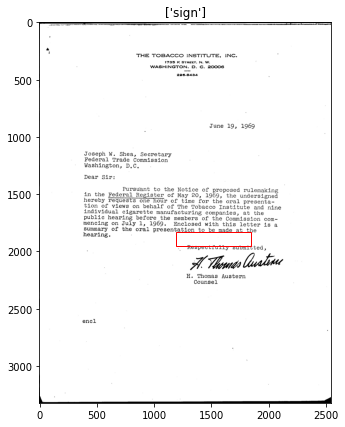

[{'position': {'height': 183, 'left': 1098, 'top': 258, 'width': 185}, 'source': {'height': 2292, 'width': 1728}, 'type': 'logo'}]


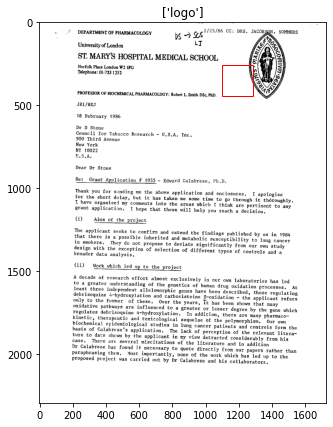

In [20]:
for img_name in files:
    object_info = flask_server_exchenge(file_name=img_name, method_name="object_localization")
    print(object_info['object_localization'])    
    image = Image.open(img_name)

    b_boxes = []
    types = []
    for obj in object_info['object_localization']:
        types.append(obj['type'])
        if types[0] != 'void':
            b_boxes.append(obj['position'])
        
    draw_result(image, types, boxes = b_boxes)

# Классификация страниц

In [21]:
print(files[1])
flask_server_exchenge(file_name=files[1], method_name="page_cassify")

images/adn64a00-page02_2.tif


{'page_cassify': {'source': {'height': 2156, 'width': 1728}, 'type': 'other'},
 'success': True}

In [22]:
for i, img_name in enumerate(files):
    print(f'{i+1}.')
    print(img_name)
    object_info = flask_server_exchenge(file_name=img_name, method_name="page_cassify")
    print(object_info['page_cassify'])    
    image = Image.open(img_name)
    
    obj_type = object_info['page_cassify']['type']
    print(obj_type)
        
    # draw_result(image, b_boxes,obj_type)

1.
images/adh36e00_2.tif
{'source': {'height': 3246, 'width': 2560}, 'type': 'other'}
other
2.
images/adn64a00-page02_2.tif
{'source': {'height': 2156, 'width': 1728}, 'type': 'other'}
other
3.
images/aki32e00.tif
{'source': {'height': 3274, 'width': 2560}, 'type': 'main'}
main
4.
images/bfr18e00-page02_1.tif
{'source': {'height': 3296, 'width': 2560}, 'type': 'main'}
main
5.
images/ciy01a00-page02_1.tif
{'source': {'height': 1575, 'width': 1200}, 'type': 'main'}
main
6.
images/nuz52d00.tif
{'source': {'height': 2292, 'width': 1728}, 'type': 'main'}
main
7.
images/obh31f00_3.tif
{'source': {'height': 1575, 'width': 1200}, 'type': 'other'}
other
8.
images/rnf51a00.tif
{'source': {'height': 3321, 'width': 2544}, 'type': 'main'}
main
9.
images/rqv98d00-page02_1.tif
{'source': {'height': 2292, 'width': 1728}, 'type': 'main'}
main
